<a href="https://colab.research.google.com/github/lanfeustX/MLTRADING/blob/main/PredictDelta_colab_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler 

In [10]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/FB_daily.csv")

KeyboardInterrupt: ignored

In [11]:
df = pd.read_csv("/FB_daily.csv")

## Preparation des données

In [12]:
import pandas_datareader as web

start_fb = "2012-05-18"
end_fb = "2020-11-17"
df_vix_fb = web.DataReader('^VIX', data_source='yahoo', start=start_fb, end=end_fb)
df_vix_fb.columns = ['high_vix', 'low_vix', 'open_vix', 'close_vix', 'volume_vix', 'adj_Close_vix']
array_vix_close = df_vix_fb['close_vix'].to_numpy()

In [13]:
df_vix_fb.head()

,high_vix,low_vix,open_vix,close_vix,volume_vix,adj_Close_vix
Date,,,,,,
2012-05-18,25.139999,23.07,23.270000,25.100000,0,25.100000
2012-05-21,24.879999,22.01,24.879999,22.010000,0,22.010000
2012-05-22,23.190001,19.98,21.760000,22.480000,0,22.480000
2012-05-23,24.620001,21.99,23.320000,22.330000,0,22.330000
2012-05-24,23.219999,21.48,22.000000,21.540001,0,21.540001


In [14]:
df.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2012-05-18,42.05,45.00,38.00,38.2318,573576400.0
1,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0
2,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0
3,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0
4,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0


In [15]:
df['vix'] = array_vix_close
df = df.reset_index(drop=True)
df = df[:-440]
len(df)
df.columns= ['date', 'open', 'high', 'low', 'close', 'volume', 'vix']
df.head()


,date,open,high,low,close,volume,vix
0,2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,25.100000
1,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,22.010000
2,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,22.480000
3,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,22.330000
4,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,21.540001


In [19]:
pip install pymyinstall

     |████████████████████████████████| 2.1MB 17.8MB/s 


In [20]:

# Répare une incompatibilité entre scipy 1.0 et statsmodels 0.8. -> source : site de Xavié dupré qui est super bien fait !
from pymyinstall.fix import fix_scipy10_for_statsmodels08
fix_scipy10_for_statsmodels08()

In [29]:
%matplotlib inline

In [22]:
cols = ['date', 'open', 'high', 'low', 'close', 'volume','vix']
mycols = ['close',  'high', 'low', 'open', 'volume', 'vix']

df2 = df.reset_index(drop=True)[mycols]
print(df2.shape)
df2.head()
data = df2['close']

(1700, 6)


In [23]:
df_pandas = df2.copy()
df_pandas["yesterday_close"] = data.shift(1)
df_pandas["delta"] = df_pandas["close"] - df_pandas["yesterday_close"]
index_with_nan = [0]
df_pandas.drop(index_with_nan, 0, inplace = True)

df_pandas.head()

,close,high,low,open,volume,vix,yesterday_close,delta
1,34.03,36.66,33.00,36.53,168192700.0,22.010000,38.2318,-4.2018
2,31.00,33.59,30.94,32.61,101786600.0,22.480000,34.0300,-3.0300
3,32.00,32.50,31.36,31.37,73600000.0,22.330000,31.0000,1.0000
4,33.03,33.21,31.77,32.95,50237200.0,21.540001,32.0000,1.0300
5,31.91,32.95,31.11,32.90,37149800.0,21.760000,33.0300,-1.1200


In [24]:
pip install statsmodels

Reg du prix Pj sur P(j-1)

In [25]:
import statsmodels
from statsmodels import regression
df_reg = df_pandas[['close', 'yesterday_close']]
model = statsmodels.regression.linear_model.OLS.from_formula('close ~ yesterday_close', data = df_reg)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
result = model.fit()


In [27]:
result.params

Intercept          0.160360
yesterday_close    0.999111
dtype: float64

suppression des outliers

> Bloc en retrait



In [28]:
index_outliers = []
index_outliers.append(df_pandas['delta'].idxmax())
index_outliers.append(df_pandas['delta'].idxmin())
index_outliers.append(923)
index_outliers.append(1493)

In [ ]:
df_pandas.drop(index_outliers,0,inplace= True)


In [ ]:
#df_output = (df_pandas['delta']-df_pandas['delta'].mean())/df_pandas['delta'].std()
df_output = (df_pandas['delta'])
array_output = df_output.to_numpy()
array_output.shape

(1695,)

## Stat desc

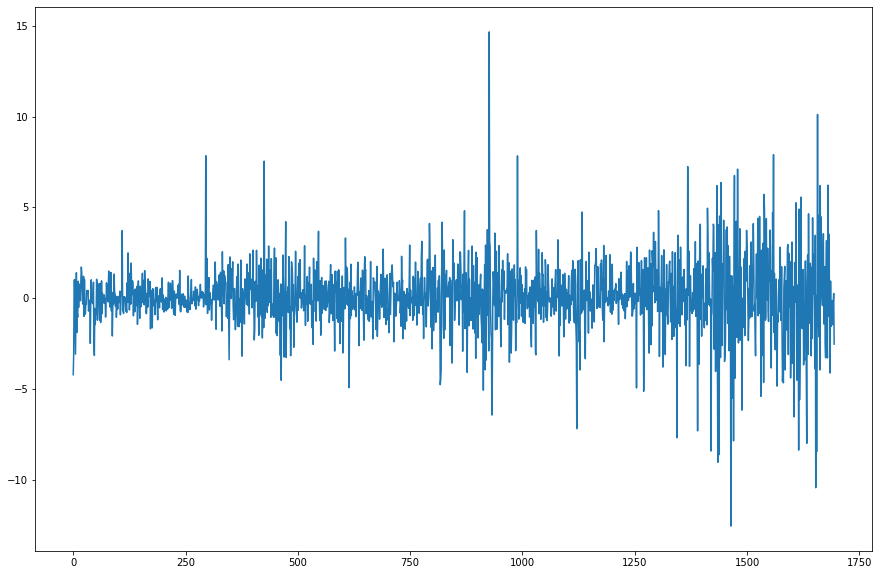

In [ ]:
plt.gcf().set_size_inches(15, 10)
plt.plot(array_output)
plt.show()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   3.,   1.,   2.,   0.,   2.,   0.,   0.,
          2.,   1.,   0.,   2.,   1.,   4.,   4.,   9.,   4.,  10.,   7.,
          7.,  23.,  14.,  15.,  20.,  18.,  27.,  45.,  68.,  93., 103.,
        145., 157., 163., 154.,  99.,  98.,  70.,  74.,  49.,  49.,  26.,
         30.,  22.,  11.,   4.,  11.,   4.,   9.,   7.,   6.,   2.,   1.,
          1.,   1.,   3.,   1.,   1.,   0.,   2.,   1.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-12.53  , -12.2581, -11.9862, -11.7143, -11.4424, -11.1705,
        -10.8986, -10.6267, -10.3548, -10.0829,  -9.811 ,  -9.5391,
         -9.2672,  -8.9953,  -8.7234,  -8.4515,  -8.1796,  -7.9077,
         -7.6358,  -7.3639,  -7.092 ,  -6.8201,  -6.5482,  -6.2763,
         -6.0044,  -5.7325,  -5.4606,  -5.1887

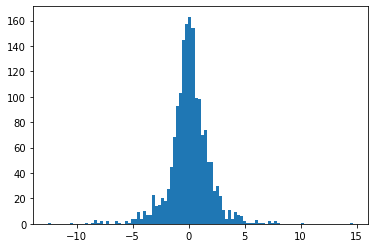

In [ ]:
plt.hist(array_output, bins=100)

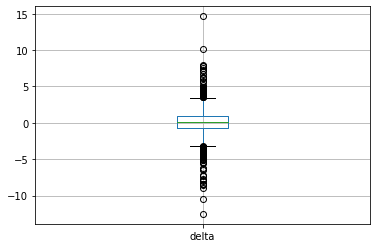

In [ ]:
df_pandas.boxplot(column = 'delta')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


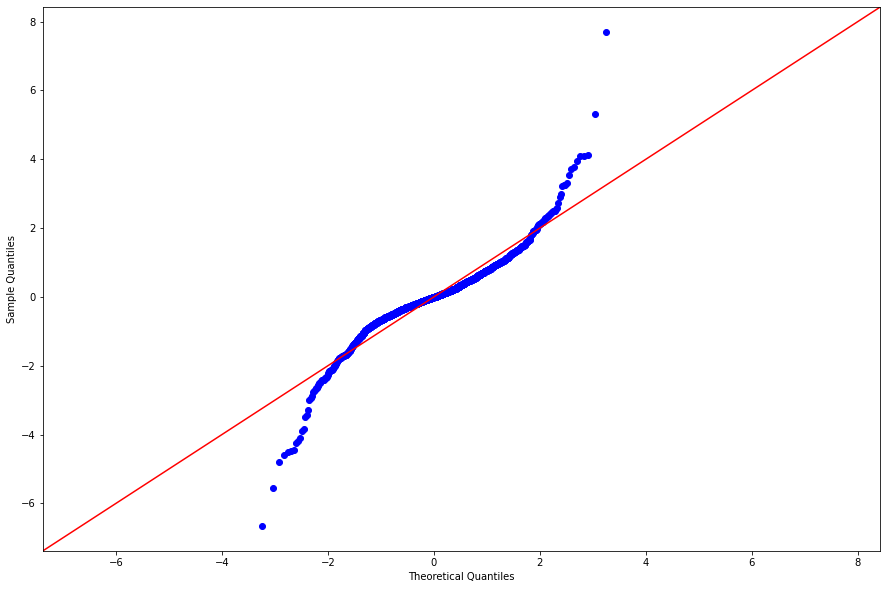

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab


sm.qqplot( (df_pandas.delta- df_pandas.delta.mean())/df_pandas.delta.std(), line='45')
plt.gcf().set_size_inches(15, 10)
pylab.show()

In [ ]:
df_output.kurtosis()

6.941021136731969

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
#df_pandas_train = df_pandas[["close","high", "low", "open", "volume",'vix']] #on n'utilise pas la colonne "yesterday_close"
df_pandas_train = df_pandas[["close",'vix']]
array_pandas_standardise = scaler.fit_transform(df_pandas_train)
#array_pandas_standardise = df_pandas_train.to_numpy()

scaler_output = MinMaxScaler(feature_range = (0,1))
array_output_min_max = (array_output-array_output.min())/(array_output.max()-array_output.min())

In [ ]:
array_output_min_max.shape

(1695,)

In [ ]:
array_output = array_output_min_max

In [ ]:
def split_data(array_train, array_output, prop_train_size, nb_columns):
    """
    
    """
    
    n = len(array_output)
    training_size = int(n*prop_train_size)
    test_size = n- training_size
    
    array_split_train = array_train[:training_size].reshape(-1,nb_columns)
    array_split_test = array_train[training_size:].reshape(-1,nb_columns)
    
    array_split_train_output = array_output[:training_size].reshape(-1,1)
    array_split_test_output = array_output[training_size:].reshape(-1,1)

    
    return array_split_train, array_split_test, array_split_train_output, array_split_test_output

def create_windows_data_XandY(array_split_train, array_split_train_output, time_step ):
    dataX = []
    dataY = []
    
    for i in range(len(array_split_train_output)- time_step - 1) : 
        set_value = array_split_train[i : (i+time_step) ,:]
        dataX.append(set_value)
        dataY.append(array_split_train_output[i + time_step])
        
    return np.array(dataX), np.array(dataY)

## Définition du modèle

### Variables globales

In [ ]:
prop_train_size = 0.65
nb_columns = 2
time_step = 50
n = len(array_output)
train_data, test_data ,train_data_y, test_data_y = split_data(array_pandas_standardise, array_output, prop_train_size, nb_columns)

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(type(train_data))
print(type(test_data))

(1101, 2)
(594, 2)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(train_data_y.shape)
print(test_data_y.shape)
print(type(train_data_y))
print(type(test_data_y))

(1101, 1)
(594, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X_train, Y_train = create_windows_data_XandY(train_data, train_data_y, time_step)
X_test, Y_test = create_windows_data_XandY(test_data, test_data_y, time_step)

In [ ]:
print(X_train.shape) # (1,1050, 50+2 )  // (2,850,50+5)
X_train.reshape(1050,100)

(1050, 50, 2)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
import keras

In [ ]:
# model = Sequential()
# #model.add(Input(shape = (50,6) ))
# model.add(LSTM(150, return_sequences = False, input_shape = (time_step, nb_columns))) 
# #model.add(LSTM(50, return_sequences = False, activation="linear"))
# #model.add(Dense(25))

# model.add(Dense(1))
# opt = keras.optimizers.Adam(learning_rate=0.05)
# model.compile(loss =  'mean_squared_error', optimizer = opt)

#model.summary()


model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape= (time_step, nb_columns))) #les input shape doivent etre les memes que les deux valeurs de fin de la fonction reshape  (X_train.shape[1], 1) definis dans la cellule un peu avant !
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences = True, input_shape= (time_step, nb_columns)))
model.add(Dropout(0.3))
model.add(LSTM(50)) 
model.add(Dense(1))

model.compile(loss =  'mean_squared_error', optimizer = 'adam', metrics = ["mae"])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10600     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 51,051
Trainable params: 51,051
Non-trainable params: 0
____________________________________________________

In [ ]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test),  verbose=1)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),  epochs = 50, batch_size=36)

33/33 [==============================] - 1s 43ms/step - loss: 0.0403 - mae: 0.1455 - val_loss: 0.0130 - val_mae: 0.0821
Epoch 1/50
30/30 [==============================] - 0s 13ms/step - loss: 0.0053 - mae: 0.0552 - val_loss: 0.0109 - val_mae: 0.0770
Epoch 2/50
30/30 [==============================] - 0s 12ms/step - loss: 0.0037 - mae: 0.0433 - val_loss: 0.0102 - val_mae: 0.0719
Epoch 3/50
30/30 [==============================] - 0s 12ms/step - loss: 0.0033 - mae: 0.0405 - val_loss: 0.0098 - val_mae: 0.0701
Epoch 4/50
30/30 [==============================] - 0s 12ms/step - loss: 0.0030 - mae: 0.0381 - val_loss: 0.0093 - val_mae: 0.0687
Epoch 5/50
30/30 [==============================] - 0s 12ms/step - loss: 0.0029 - mae: 0.0376 - val_loss: 0.0097 - val_mae: 0.0719
Epoch 6/50
30/30 [==============================] - 0s 13ms/step - loss: 0.0033 - mae: 0.0409 - val_loss: 0.0093 - val_mae: 0.0684
Epoch 7/50
30/30 [==============================] - 0s 12ms/step - loss: 0.0033 - mae: 0.0401 

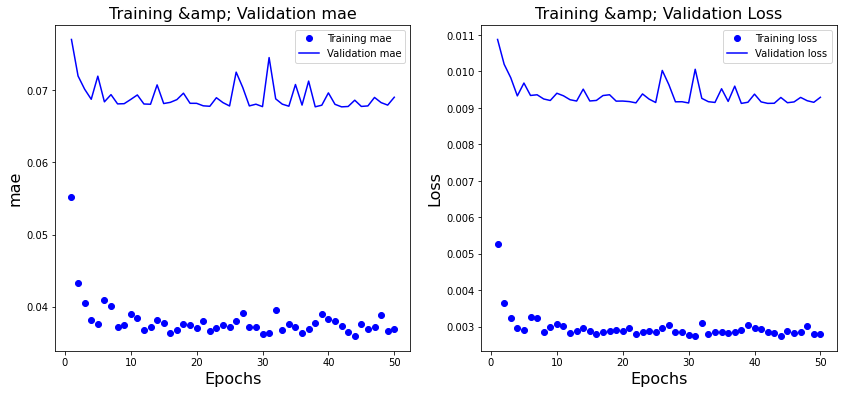

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training mae')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation mae')
ax[0].set_title('Training &amp; Validation mae', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('mae', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training &amp; Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

An underfit model can be identified from the learning curve of the training loss only.

It may show a flat line or noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all.

An example of this is provided below and is common when the model does not have a suitable capacity for the complexity of the dataset.

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict.shape

(1050, 1)

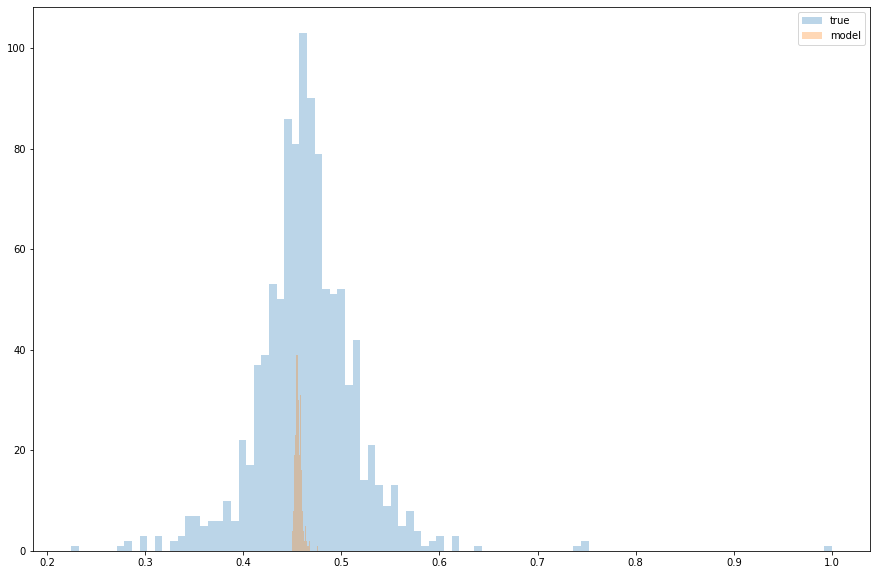

In [ ]:
plt.figure(figsize=(15,10))

plt.hist(Y_train.reshape(-1), bins = 100, label = "true", alpha =0.3)
plt.hist(train_predict.reshape(-1), bins = 100, label = "model", alpha=0.3)
plt.legend()
plt.show()

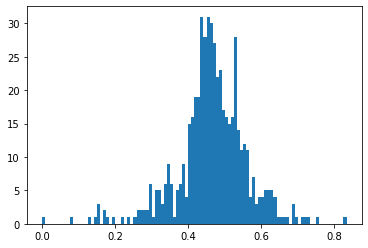

IndexError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(5):
  plt.figure()
  plt.hist(Y_test[:,i], bins =100)
  plt.show()

In [ ]:
X_test.shape

(543, 50, 2)

In [ ]:
print(test_predict)
print(Y_train)

[[0.45258147]
 [0.45261437]
 [0.45256174]
 [0.45241824]
 [0.45219073]
 [0.4519403 ]
 [0.4517018 ]
 [0.45153773]
 [0.45152897]
 [0.4516964 ]
 [0.45204753]
 [0.4524133 ]
 [0.45263386]
 [0.452661  ]
 [0.45248222]
 [0.45216602]
 [0.45177934]
 [0.4513582 ]
 [0.45096403]
 [0.45059514]
 [0.45032188]
 [0.4501932 ]
 [0.45022848]
 [0.45031002]
 [0.45038545]
 [0.4503989 ]
 [0.45030457]
 [0.4501124 ]
 [0.4498597 ]
 [0.44970286]
 [0.44967678]
 [0.44974104]
 [0.44987884]
 [0.44998682]
 [0.45006523]
 [0.45010993]
 [0.45012972]
 [0.45008495]
 [0.44998887]
 [0.44987833]
 [0.44974956]
 [0.44971466]
 [0.4497691 ]
 [0.4498625 ]
 [0.4499705 ]
 [0.45007753]
 [0.4501771 ]
 [0.45023856]
 [0.450307  ]
 [0.45045176]
 [0.45062834]
 [0.45075274]
 [0.45073977]
 [0.45062006]
 [0.4504498 ]
 [0.4502957 ]
 [0.45021254]
 [0.45014787]
 [0.45005926]
 [0.45002145]
 [0.44998714]
 [0.4499214 ]
 [0.44983095]
 [0.4497318 ]
 [0.4497333 ]
 [0.44985878]
 [0.45010316]
 [0.45040482]
 [0.45067742]
 [0.45080966]
 [0.4507818 ]
 [0.45

In [ ]:
print(train_predict.shape)
print(test_predict.shape)

(1050, 1)
(543, 1)


In [ ]:
import math
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_train,train_predict))
print(mean_squared_error(Y_test,test_predict))

0.0029515523234794126
0.009312341498757424


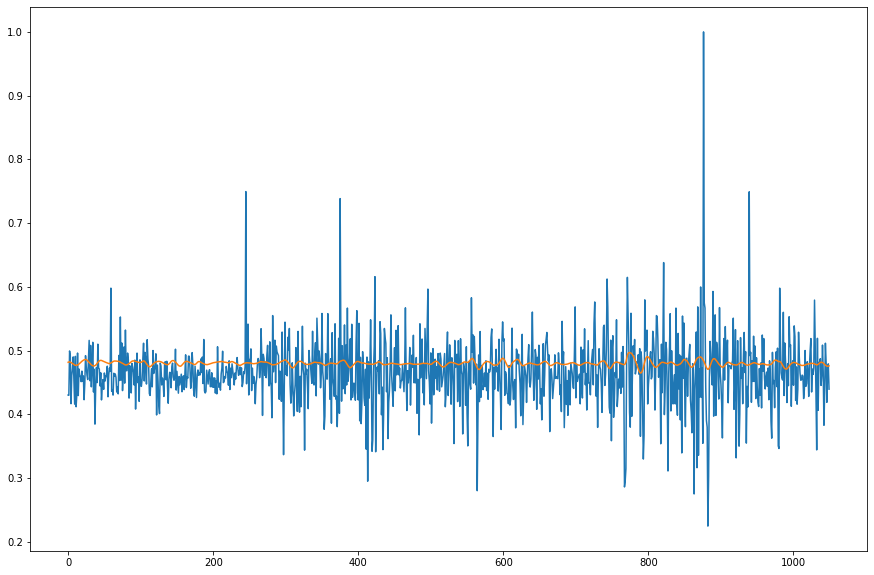

In [ ]:
#plt.plot(array_output[200:817])
plt.figure(figsize=(15,10))
plt.plot(Y_train)
plt.plot(train_predict)
#plt.gcf().set_size_inches(15, 10)

plt.show()

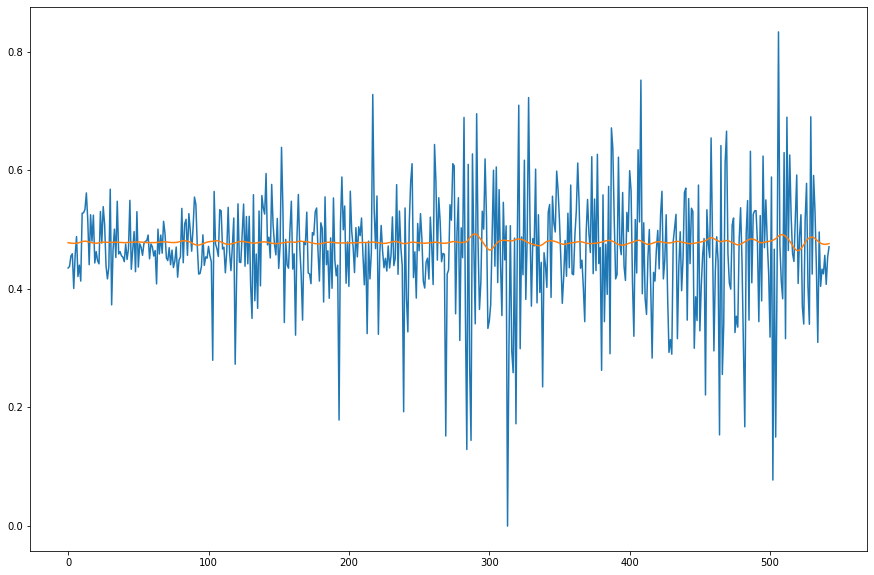

In [ ]:
#plt.plot(array_output[917:])
plt.plot(Y_test)

plt.plot(test_predict)
plt.gcf().set_size_inches(15, 10)

plt.show()

In [ ]:
print(Y_train.mean())
print(Y_test.mean())
print(Y_train.std())
print(Y_test.std())

0.4645675055605178
0.4643864165747212
0.05238487022518451
0.09554553463018163
